In [ ]:
### Gradient

###### y = 2x^2
###### di/y , x = 1

In [5]:
# tf.gradients()

import tensorflow as tf

x = tf.placeholder(tf.float32)
y = 2 * x * x ## math function
var_grad = tf.gradients(y,x)

with tf.Session() as session:
    var_grad_val = session.run(var_grad,feed_dict={x:1})
    print var_grad_val



[4.0]


### Pseudo Random Number Generator

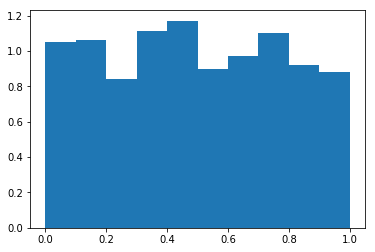

In [16]:
## Uniform dist
## random_uniform(shape, minval, maxval, dtype, seed, name)

import tensorflow as tf
import matplotlib.pyplot as plt

uniform = tf.random_uniform([1000],minval = 0 , maxval = 1 , dtype= tf.float32)

with tf.Session() as session:
#     print uniform.eval()
    plt.hist(uniform.eval(),normed=True)
    plt.show()

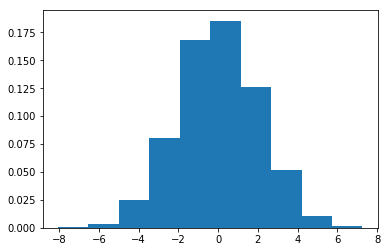

In [17]:
## Normal dist
## random_normal(mean,stddev)

import tensorflow as tf
import matplotlib.pyplot as plt

uniform = tf.random_normal([10000],mean=0,stddev=2)

with tf.Session() as session:
#     print uniform.eval()
    plt.hist(uniform.eval(),normed=True)
    plt.show()

### Montecarlo's method

[ 0.01486564]


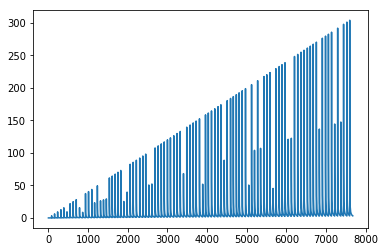

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
trials = 100
hits = 0

x = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
y = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
pi = []

sess = tf.Session()
print sess.run(x)

with sess.as_default():
    for i in range(1,trials):
        for i in range(1,trials):
            if x.eval()**2+y.eval()**2<1:
                hits=hits+1
                pi.append((4*float(hits)/i)/trials)
plt.plot(pi)
plt.show()


### Partial Differential Equation (PDE)

In [32]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np

#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

#A function for displaying the state of the pond's surface as an image.

def DisplayArray(a, fmt='jpeg', rng=[0,1]):
  """Display an array as a picture."""
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  clear_output(wait = True)
  display(Image(data=f.getvalue()))

'''Here we start an interactive TensorFlow session for convenience in playing around. A regular session would work as well if we were doing this in an executable .py file.

sess = tf.InteractiveSession()

Computational Convenience Functions'''

def make_kernel(a):
  """Transform a 2D array into a convolution kernel"""
  a = np.asarray(a)
  a = a.reshape(list(a.shape) + [1,1])
  return tf.constant(a, dtype=1)

def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def laplace(x):
  """Compute the 2D laplacian of an array"""
  laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
  return simple_conv(x, laplace_k)



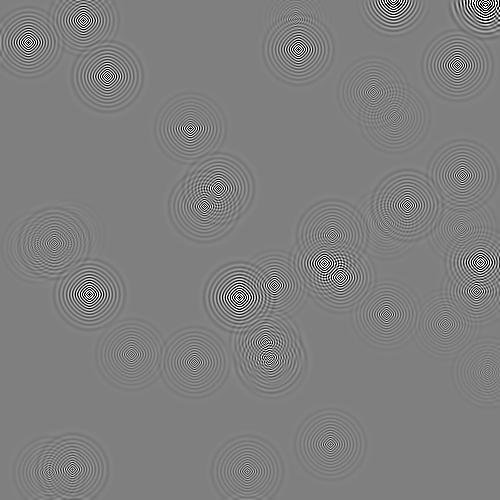

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
N = 500
u_init = np.zeros([N,N],dtype=np.float32)

for n in range(40):
    a,b = np.random.randint(0,N,2)
    u_init[a,b] = np.random.uniform()
DisplayArray(u_init, rng=[-0.1, 0.1])

ut_init = np.zeros([N,N],dtype=np.float32)

eps = tf.placeholder(tf.float32,shape=())
damping = tf.placeholder(tf.float32,shape=())

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

U_=U+eps*Ut
Ut_=Ut+eps*(laplace(U)-damping *Ut)

step = tf.group(U.assign(U_),Ut.assign(Ut_))

tf.global_variables_initializer().run(session=sess)

# Run 1000 steps of PDE
for i in range(1000):
#     Step simulation
    step.run(session=sess,feed_dict={eps: 0.03, damping: 0.04})
    if i % 50 == 0:
        clear_output()
        DisplayArray(U.eval(session=sess), rng=[-0.1, 0.1])

